In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn 
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()

- CRIM 住房所在城鎮的人均犯罪率
- ZN 住房用地超過 25,000 平方尺的比例
- INDUS 住房所在城鎮非零售商用土地的比例
- CHAS 有關查理斯河的虛擬變數(如果住房位於河邊則為 1，否則為 0)
- NOX 一氧化氮濃度
- RM 每處住房的平均房間數
- AGE 建於 1940 年之前的業主自住房比例
- DIS 住房距離波士頓五大中心區域的加權距離
- RAD 距離住房最近的公路入口編號
- TAX 每 10,000 美元的全額財產稅金額
- PTRATIO 住房所在城鎮的師生比例
- B 1000(Bk-0.63)^2，其中 Bk 指代城鎮中黑人的比例
- LSTAT 弱勢群體人口所占比例
- MEDV 業主自住房的中位數房價(以千美元計)

In [3]:
data_df = pd.DataFrame(data=data.data,columns=data.feature_names)
data_df["MEDV"] = data.target
data_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
data_df.describe()
# 可以稍微檢查一下 類別型有沒有異常
# 百分比率 有沒有不合理
# 資料筆數是否相同

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### 檢查有無缺失值

In [5]:
data_df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [6]:
# to_numeric 將一列或多列轉為數值最佳方法，會嘗試將字串改為整數浮點，若不能轉換則為NAN
# astype 強行轉換
# infer_objects 推論轉換
data_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

C:\Users\adamw\AppData\Local\Temp\ipykernel_2020\3092774050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.target)


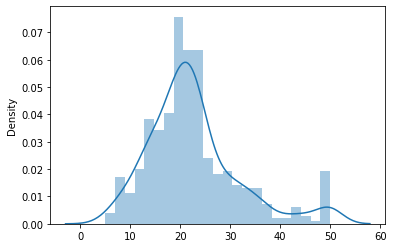

In [7]:
sns.distplot(data.target)
plt.show()

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

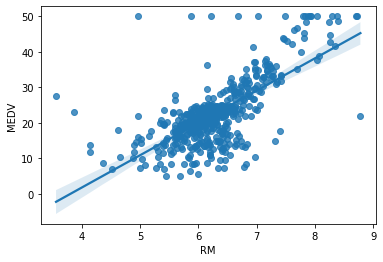

In [8]:
# regplot()：根據資料繪製線性迴歸(Linear Regression)模型圖
# 透過簡單線性回歸可看出 平數 與 房價 呈現正相關
sns.regplot(x=data_df["RM"], y=data_df["MEDV"])


<AxesSubplot:>

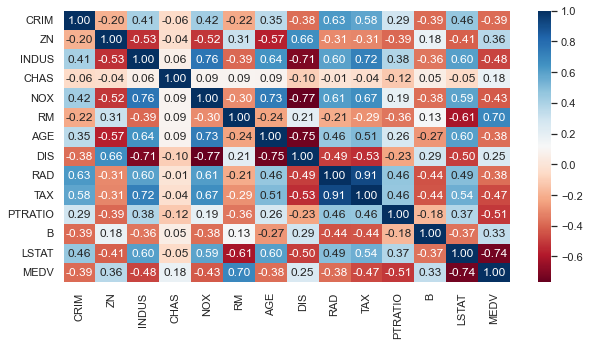

In [9]:
#透過皮爾森映射熱力圖看出哪些特徵與目標變數有較高的相關性。

sns.set(rc={"figure.figsize":(10,5)})
sns.heatmap(data=data_df.corr(),cmap="RdBu", #cmap="Greens"
 annot_kws={"size":12},
 annot=True,
 fmt=".2f")


元迴歸分析造成下列的不良影響：
1. 膨脹最小平方法（least squares）估計參數值的變異數和共變數，使得迴歸係數的
估計值變得很不精確。
2. 膨脹迴歸係數估計值的相關係數。
3. 膨脹預測值的變異數，但對預測能力不影響。
4. 造成解釋迴歸係數及其信賴區間估計之困難。
5. 造成整體模式的考驗達顯著，但各別迴歸係數之考驗不顯著的矛盾現象和解釋上
之困擾。
6. 造成迴歸係數的正負號與所期望者相反的衝突現象，這是由於自變項間之壓抑效
果（suppress effect）造成的。
一個比較簡單的診斷方法是察看自變項間的相關係數矩陣，看看該矩陣中是否
有元素值（即自變項兩兩之間的相關係數值）是大於.90 以上者，若有，即表示該二
變項互為「多元共線性變項」，並認為該迴歸分析中有嚴重的多元共線性問題存在。
另一個比較正式、客觀的診斷法，則為使用第 j 個自變項的「變異數膨脹因數」
（variance inflation factor）作為判斷的指標，凡變異數膨脹因數指標值大於 10 者，
即表示第 j 個自變項是一個多元共線性變項。
在一般的迴歸分析中，針對這種多元共線性問題，有些統計學家會建議將多元
共線性變項予以刪除，不納入迴歸方程式中。但避免多元共線性問題所造成困擾的
最佳解決方法，不是刪除該具有多元共線性變項，而是使用所謂的「偏差迴歸分析」
（biased regression analysis, BRA）。其中以「山脊型迴歸」（ridge regression）最受到
學者們的重視和使用；除此之外，尚有「主成分迴歸」（principal component
regression）、「潛在根迴歸」（latent root regression）、「貝氏法迴歸」（Baysean
regression）、「遞縮式迴歸」（shrinkage regression）等，不過這些偏差迴歸分析法所獲
得的迴歸係數值都是「有偏差的」（biased），亦即這些迴歸係數的期望值不等於母群
體的迴歸係數值，所以稱作偏差迴歸係數估計值，而本補救多元共線性問題的方法
即稱作偏差迴歸分析法。


In [64]:
x = data_df.drop("MEDV",axis=1)
y = data_df["MEDV"]

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [66]:
np.set_printoptions(precision=3, suppress=True)
reg = LinearRegression()
reg.fit(x_train,y_train)
coef_df = pd.DataFrame(columns=x_train.columns,data=reg.coef_.reshape(1,13))
predict = pd.DataFrame(reg.predict(x_test))
print("訓練集score",reg.score(x_train,y_train))
print("測試集score",reg.score(x_test,y_test)) 
# score 會把x_test拿去predict，之後再與y_test進行r2計算，與統計模型的r2_score一樣
# 只是r2_score需要傳入predict的結果
print("w權重",reg.coef_)
coef_df

# 可以看出RM對於房價的影響是比較高的
# 負相關的部分可以思考一下為什麼，例如NOX(一氧化碳農度)可以看出對於房價是負影響，可能工業區或嚴重汙染地區

訓練集score 0.7645451026942549
測試集score 0.6733825506400171
w權重 [ -0.121   0.044   0.011   2.511 -16.231   3.859  -0.01   -1.5     0.242
  -0.011  -1.018   0.007  -0.487]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.12131,0.044466,0.011342,2.511246,-16.231253,3.859068,-0.009985,-1.50027,0.242143,-0.011072,-1.017753,0.006814,-0.486738



如果預測房價和實際房價一致的話，那麼所有的資料點都應該彙
集在 y = x 這條線上，但這並不是現實，於是可以看到，除了少數點，大部分點散落在 y = x
附近，大趨勢說明預測的結果還不錯。


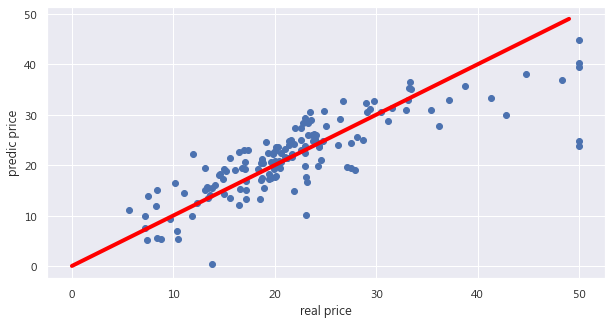

In [39]:
plt.scatter(y_test,predict)
plt.ylabel("predic price")
plt.xlabel("real price")
x = np.arange(0, 50)
y = x
plt.plot(x, y, color="red", lw=4)

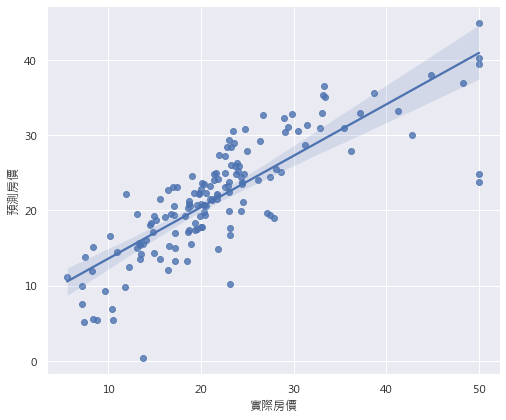

In [18]:
predict = pd.Series(predict)
#重新設定 index
y_test.reset_index(inplace=True, drop=True)
predict.reset_index(inplace=True, drop=True)
draw_data = pd.concat([y_test,predict],axis=1)
draw_data.columns = ["實際房價","預測房價"]
#用於正常顯示中文，Apple Mac 可選用 Arial
plt.rcParams["font.sans-serif"] = "Microsoft JhengHei"
#用於正常顯示符號
plt.rcParams["axes.unicode_minus"] = False
sns.lmplot(x="實際房價", y="預測房價",
 data=draw_data,
 height=6,
 aspect=1.2,
 ci=95)

量化評估指標
###
但依經驗歸納如下：R2的
值大於 0.75，表示迴歸模型擬合度很好，迴歸方程的可解釋程度較高，即迴歸方程的精度較
高。R2 的值在 0.5 和 0.75 之間，表示迴歸模型的擬合可以接受，但需要進一步修正迴歸模型。
R2 的值小於 0.5，表示迴歸模型擬合有問題，

In [45]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,predict)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predict))
r2 = metrics.r2_score(y_test, predict)
print(mse)
print(rmse)
print(r2)


27.195965766883408
5.214975145375423
0.6733825506400171


=====================================================================================================================================

### 訓練完準確度不高怎麼辦

為甚麼「訓練模型的正確率」這麼低呢（正確率：0.7645451026942549）？
因為線性迴歸的的方程式為一條直線，當特徵與房價不成線性關係的話，那麼再怎麼分析，正確率都不會高。
解決的方法有：(1).只討論呈線性關係的特徵、(2).使用多項式迴歸、(3).降維。


### (一) 以特徵重要性訓練模型

In [ ]:

boston_house = load_boston()
boston_house_df = pd.DataFrame(data=boston_house.data,columns=boston_house.feature_names)
boston_house_price = boston_house.target


前述分析是直接使用所有的 13 個特徵，如果可以只選取比較重要的特徵出來分析？特別注意到如果要找尋重要性的話，一定要先做標準化，不然數據
跑出來的結果會整個失真。

In [68]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler() # Z-scaler 物件
X_scaled = scale.fit_transform(boston_house_df)
X_scaled_df = pd.DataFrame(X_scaled,columns=boston_house_df.keys())
X_scaled_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


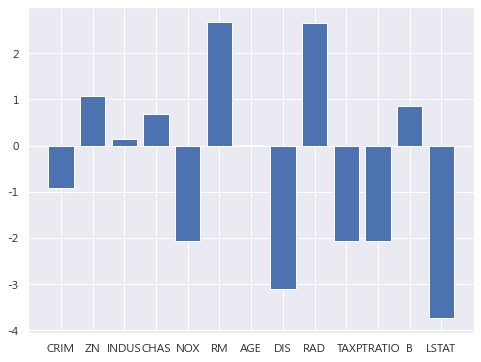

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
LR_model = LinearRegression()
LR_model.fit(X_scaled, boston_house_price)
feature_importance = LR_model.coef_ #重要性
plt.figure(figsize=(8,6)) #圖形大小
plt.bar(X_scaled_df.columns, feature_importance) #繪製成直方圖
plt.show() 

基本上數值（取絕對值後）越大代表越重要。因此嘗試將 CRIM、INDUS、CHAS、AGE、
B 刪除，只使用 ZN、NOX、RM、DIS、RAD、TAX、PTRATIO、LSTAT 再做一次線性迴歸，
來預測房價。

In [69]:
x = boston_house_df.drop(["CRIM","INDUS","CHAS","AGE","B"],axis=1)
y = boston_house_price
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(354, 8)
(152, 8)
(354,)
(152,)


In [103]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
train_score = model.score(x_train, y_train)
print(f"訓練模型的正確率：{train_score}")
print(f"測試模型的正確率：{model.score(x_test,y_test)}")
print("="*45)
# #評估模型
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print("1.均方誤差(MSE) =", mse)
print("2.均方根誤差(RMSE) =", rmse)
print("3.判定係數(R^2）=", r2)
# 以比較重要的特徵下去跑，在這樣的資料下 看起來並沒有比較高

訓練模型的正確率：0.7645451026942549
測試模型的正確率：0.6733825506400202
1.均方誤差(MSE) = 27.195965766883152
2.均方根誤差(RMSE) = 5.214975145375398
3.判定係數(R^2）= 0.6733825506400202


### (二) PCA 降維

In [ ]:

boston_house = load_boston()
x = pd.DataFrame(data=boston_house.data,columns=boston_house.feature_names)
y = boston_house.target


In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
 train_test_split(x, y,
 test_size=0.3,
 random_state=0) #4

train 0.7355493595310202
test 0.6195796461346548


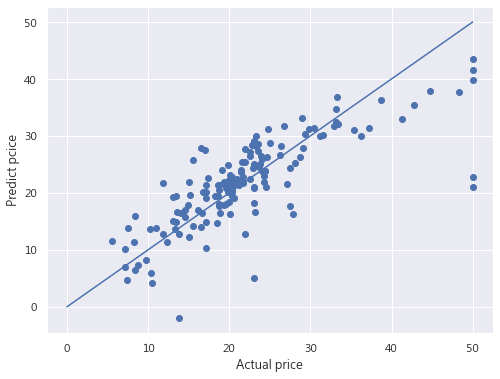

In [106]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
# Standarize our training data
std_tool = StandardScaler()
std_tool.fit(x_train)
x_train = std_tool.transform(x_train)
# PC 降維
pca = decomposition.PCA(n_components=0.95)
pca.fit(x_train)
x_train = pca.transform(x_train)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
lr_model = LinearRegression()
lr_model.fit(x_train, y_train) #將資料拿去訓練
# Standarize x_test
x_test = std_tool.transform(x_test)
# Dimension reduction usng PCA
x_test = pca.transform(x_test)
#將 test 的資料用訓練出來的模型去預測
y_predict = lr_model.predict(x_test)
plt.figure(figsize=(8,6))
plt.xlabel("Actual price") #X 軸的標題
plt.ylabel("Predict pcice") #Y 軸的標題
plt.plot([0,50], [0,50]) #劃一條基準線
plt.scatter(y_test, y_predict) #比對預測跟實際的差
print("train",lr_model.score(x_train, y_train))
print("test",lr_model.score(x_test, y_test))

### (三) 多項式

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
boston_house = load_boston()
x = pd.DataFrame(data=boston_house.data,columns=boston_house.feature_names)
y = boston_house.target

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=0) 



In [110]:
model=make_pipeline(PolynomialFeatures(2),linear_model.LinearRegression())
model.fit(x_train,y_train)
print("train",model.score(x_train,y_train))
print("test",model.score(x_test,y_test))


train 0.9109835846120083
test 0.5192105747708403


SVM

神經網路